In [1]:
import json 

!pip install tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 33.8MB/s 
     |████████████████████████████████| 419kB 44.3MB/s 
     |████████████████████████████████| 3.0MB 43.5MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2019-09-22 07:03:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.184.128, 2a00:1450:400c:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.184.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2019-09-22 07:03:45 (39.3 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)
  
sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [0]:
training_sentences = sentences[0 : training_size]
testing_sentences = sentences[training_size : ]

training_labels = labels[0 : training_size]
testing_labels = labels[training_size : ]

In [0]:
tokenizer = Tokenizer(num_words = vocab_size,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)


word_index = tokenizer.word_index


training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_length,
                                padding = padding_type,
                                truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_length,
                               padding = padding_type,
                               truncating = trunc_type)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epochs = 30

history = model.fit(training_padded, training_labels,
                    epochs = num_epochs,
                    validation_data = (testing_padded,
                                       testing_labels),
                    verbose = 2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 3s - loss: 0.6713 - accuracy: 0.5702 - val_loss: 0.6116 - val_accuracy: 0.6575
Epoch 2/30
20000/20000 - 2s - loss: 0.4519 - accuracy: 0.8183 - val_loss: 0.3877 - val_accuracy: 0.8408
Epoch 3/30
20000/20000 - 2s - loss: 0.3138 - accuracy: 0.8752 - val_loss: 0.3534 - val_accuracy: 0.8542
Epoch 4/30
20000/20000 - 2s - loss: 0.2596 - accuracy: 0.8986 - val_loss: 0.3431 - val_accuracy: 0.8568
Epoch 5/30
20000/20000 - 2s - loss: 0.2239 - accuracy: 0.9133 - val_loss: 0.3449 - val_accuracy: 0.8578
Epoch 6/30
20000/20000 - 2s - loss: 0.1962 - accuracy: 0.9245 - val_loss: 0.3506 - val_accuracy: 0.8550
Epoch 7/30
20000/20000 - 2s - loss: 0.1751 - accuracy: 0.9333 - val_loss: 0.3646 - val_accuracy: 0.8548
Epoch 8/30
20000/20000 - 2s - loss: 0.1558 - accuracy: 0.9421 - val_loss: 0.3830 - val_accuracy: 0.8505
Epoch 9/30
20000/20000 - 2s - loss: 0.1396 - accuracy: 0.9488 - val_loss: 0.4022 - val_accuracy: 0.8509
Epoch 10/30
200

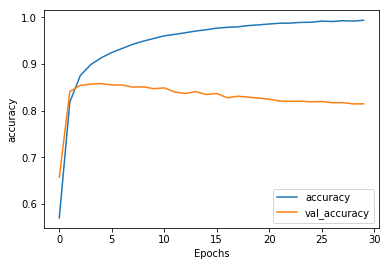

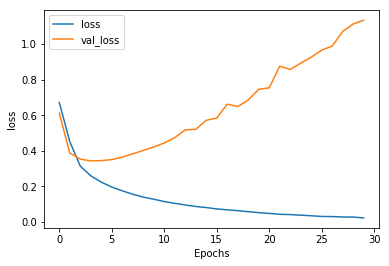

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [12]:
reverse_word_index = dict([(value, key) for (key, value) in 
                           word_index.items()])

def decode_sentence(text):
  return ' '.join([reverse_word_index.get(i, '?')
                   for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [13]:
e = model.layers[0]

weights = e.get_weights()[0]

print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [0]:
import io

out_v = io.open('sarcasm_vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('sarcasm_meta.tsv', 'w', encoding = 'utf-8')

for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('sarcasm_vecs.tsv')
  files.download('sarcasm_meta.tsv')

In [17]:
sentence = [
    "granny starting to fear spiders in the garden might be real",
    "game of thrones season finale showing this sunday night"
]

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, 
                       maxlen = max_length,
                       padding = padding_type,
                       truncating = trunc_type)
print(model.predict(padded))

[[8.8710117e-01]
 [3.8116644e-07]]
